In [1]:
pip install plotly jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

# EDA

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


According to Above Table:
* Mean of Age looks very weird. Hence, It should be checked.
* Distribution of Credit score is very various. It should be checked.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***Depending on the info table, Some columns can be discarded. They are repectively CustomerId and Surname.***


In [8]:
df=df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Categorical Columns : 
* Geography
* Gender
### Numerical Columns :
* CreditScore
* Age
* Tenure
* Balance
* NumOfProducts
* HasCrCard 
* IsActiveMember
* EstimatedSalary
* Exited

In [10]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***There are not any null cells. That sounds great.***

In [12]:
df.duplicated().sum()

0

There is not any duplicated value.

# Finding outliers

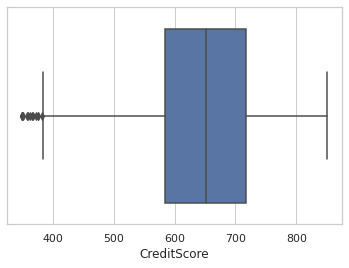

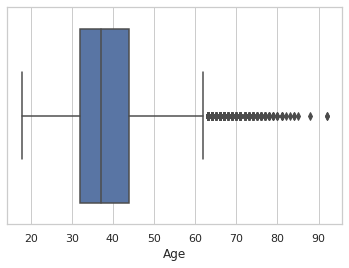

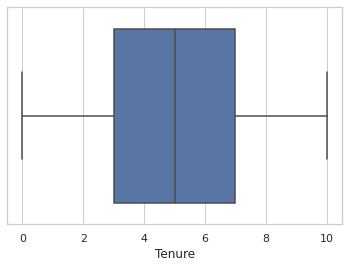

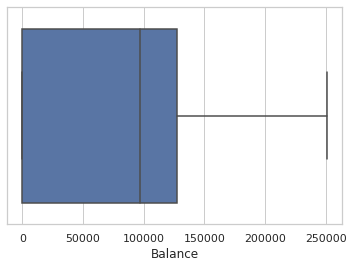

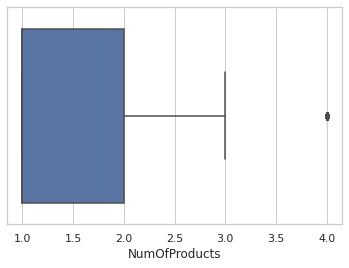

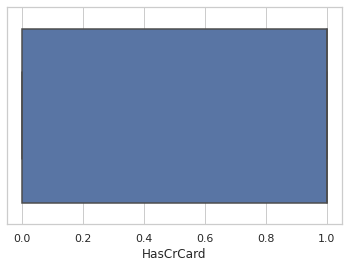

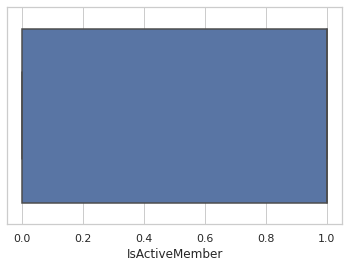

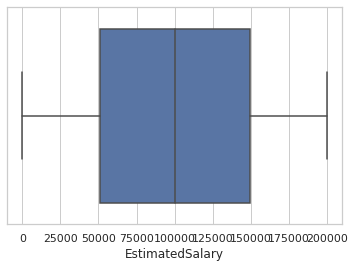

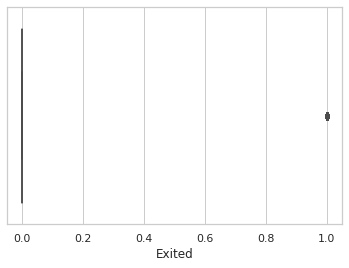

In [13]:
colnames = df.select_dtypes(['int64','float64']).columns
for i in colnames:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

Credit Score and Age should be checked.

## Credit Score 

In [14]:
Credit_Score = df["CreditScore"]
Credit_Score

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [15]:
Credit_Score.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

According staticts results of Credit Score:
1. Range is not very big. Hence, Maybe it can be said that it has no outlier value.
1. Standart Deviation and Mean are very far each other. Therefore, it can be said that The data is quite diverse.    

In [16]:
fig = px.histogram(df, x="CreditScore", title='Histogram of Credit Score',color_discrete_sequence=['indianred'])
fig.show()

According to histogram, iy can be said that data of credit score is normal distribution. However, 233 number of people have credit score which is between 850 and 854. Therefore, It would be Better that not stick to just one chart. 

In [17]:
fig = px.box(df["CreditScore"], y="CreditScore")
fig.show()

Some outliers are observed. The deletion would be better for dataset.  

In [18]:
df1 = df[(df["CreditScore"]>383) & (df["CreditScore"]<850)]

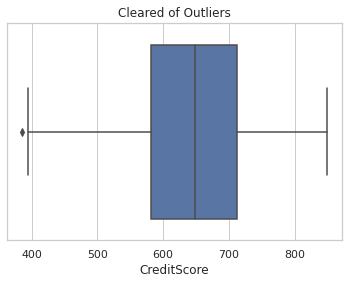

In [19]:
sns.boxplot(x=df1["CreditScore"])
plt.title("Cleared of Outliers");

# AGE

In [20]:
df1["Age"].describe()

count    9751.000000
mean       38.914163
std        10.486128
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

According staticts results of Age:    
1. Datas of age columns for mean and standart deviation are not considerably close each other.      
1. Assumed that some outliars would be exis. Becuase range of Q3 and MAX value is little bit high.     

In [21]:
fig = px.histogram(df1, x="Age", title='Histogram of Age',color_discrete_sequence=['indianred'])
fig.show()

When look at the histagram, there are some outliers. 

In [22]:
fig = px.box(df["Age"], y="Age")
fig.show()

Some outliers are observed. The deletion would be better for dataset.

In [23]:
df2 = df1[(df1["Age"]>18) & (df1["Age"]<62)]

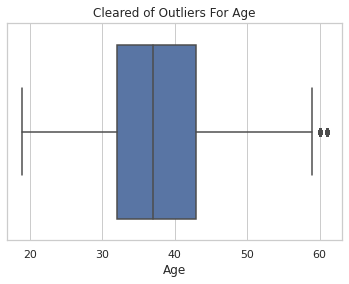

In [24]:
sns.boxplot(x=df2["Age"])
plt.title("Cleared of Outliers For Age");

# Multivariate Outlier Observation

In [25]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [26]:
clf.fit_predict( df2.select_dtypes(['int64','float64']))

array([ 1,  1, -1, ...,  1,  1,  1])

In [27]:
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-29.61677923, -22.26047806, -19.04530363, -18.55533562,
       -17.00673945,  -6.61804204,  -4.35176605,  -2.76240615,
        -1.99466756,  -1.86230105,  -1.85478   ,  -1.81574586,
        -1.7572226 ,  -1.70971408,  -1.66145578,  -1.65139949,
        -1.62595199,  -1.61392478,  -1.5891938 ,  -1.58641512])

In [28]:
fig = px.box(df_scores)
fig.show()

In [29]:
Treshhold = -1.092474

In [30]:
new_df = df2[df_scores>Treshhold ]

In [31]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
new_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Visualization & Data Analysis

In [33]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')